# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Reading the dataset

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df['Total_Conversion'].value_counts()

Total_Conversion
1     666
2     162
3      78
4      61
5      41
6      22
7      16
8      13
11     13
13      9
0       8
10      8
9       7
17      4
16      4
14      4
12      4
22      4
23      3
26      2
31      2
20      2
24      1
28      1
40      1
15      1
19      1
38      1
60      1
21      1
18      1
30      1
Name: count, dtype: int64

In [5]:
df['Approved_Conversion'].unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13],
      dtype=int64)

# Data Exploration

In [6]:
# Getting basic information about the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
df['ad_id'].nunique()

1143

In [8]:
df['xyz_campaign_id'].nunique()

3

In [9]:
df['fb_campaign_id'].nunique()

691

In [10]:
xyz_imp = df.groupby('xyz_campaign_id', as_index = False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
xyz_imp

,xyz_campaign_id,Impressions,Clicks,Spent
0,916,482925,113,149.710001
1,936,8128187,1984,2893.369999
2,1178,204823716,36068,55662.149959


In [11]:
melt = pd.melt(xyz_imp, id_vars = ['xyz_campaign_id'], value_vars = ['Impressions', 'Clicks', 'Spent'], var_name = 'result', value_name = 'total')
melt

,xyz_campaign_id,result,total
0,916,Impressions,4.829250e+05
1,936,Impressions,8.128187e+06
2,1178,Impressions,2.048237e+08
3,916,Clicks,1.130000e+02
4,936,Clicks,1.984000e+03
5,1178,Clicks,3.606800e+04
6,916,Spent,1.497100e+02
7,936,Spent,2.893370e+03
8,1178,Spent,5.566215e+04


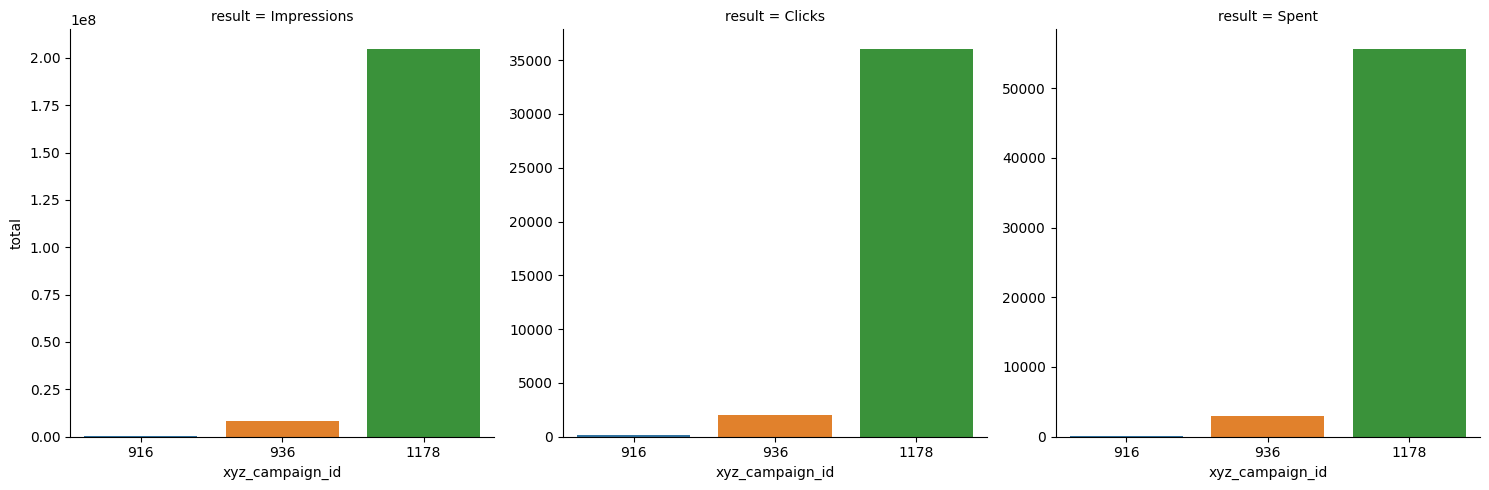

In [12]:
sns.catplot(x = 'xyz_campaign_id', y = 'total', col = 'result', data = melt, kind = 'bar', sharey = False)
plt.show()

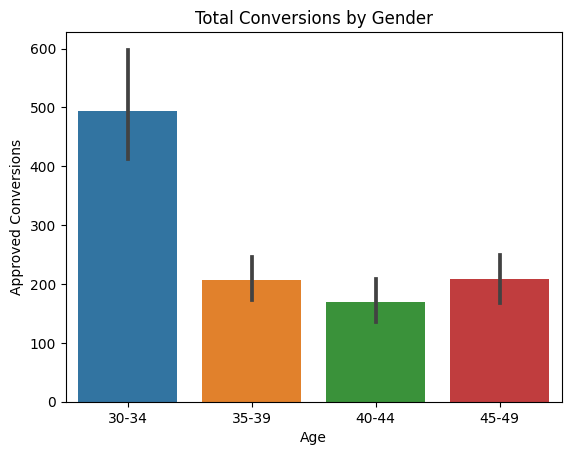

In [13]:
sns.barplot(x='age', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Age')
plt.ylabel('Approved Conversions')
plt.show()

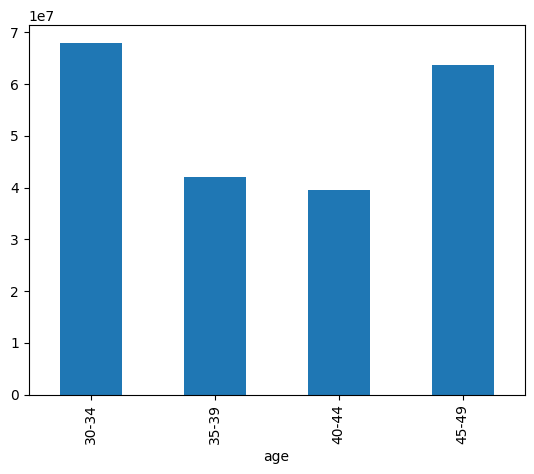

In [14]:
imp_by_age = df.groupby('age')['Impressions'].sum()
imp_by_age.plot(kind = 'bar')
plt.show()

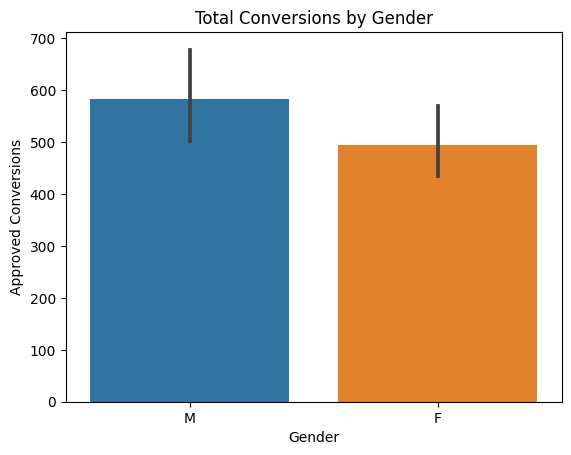

In [15]:
sns.barplot(x='gender', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Gender')
plt.ylabel('Approved Conversions')
plt.show()

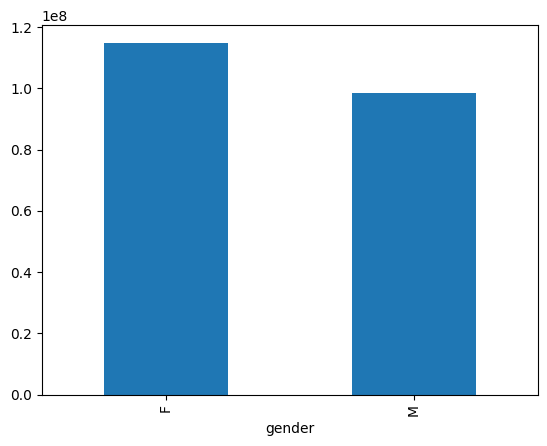

In [16]:
imp_by_gender = df.groupby('gender')['Impressions'].sum()
imp_by_gender.plot(kind = 'bar')
plt.show()

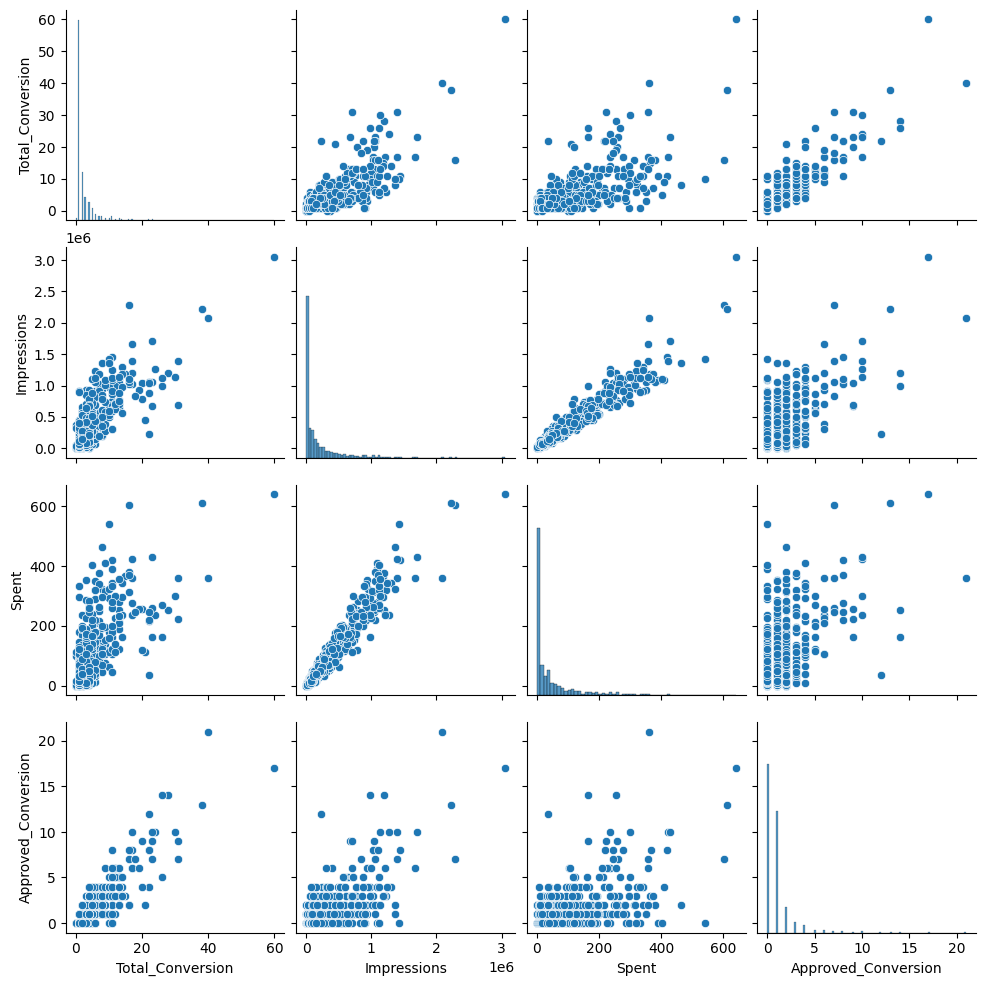

In [17]:
sns.pairplot(df[['Total_Conversion', 'Impressions', 'Spent', 'Approved_Conversion']])
plt.show()

In [18]:
 performance =df.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 
                                                        'Clicks': 'sum', 
                                                        'Spent': 'sum', 
                                                        'Total_Conversion': 'sum', 
                                                        'Approved_Conversion': 'sum'})

In [19]:
 performance.reset_index(inplace = True)

In [20]:
 performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,482925,113,149.710001,58,24
1,936,8128187,1984,2893.369999,537,183
2,1178,204823716,36068,55662.149959,2669,872


# Feature Engineering

# Correlation Checking

In [21]:
# corr_matrix = df.corr()
# corr_matrix['Total_Conversion'].sort_values(ascending=False)

In [22]:
# columns_to_drop = ['Approved_Conversion','Impressions', 'Spent', 'Clicks','Total_Conversion']
# X = df.drop(columns= columns_to_drop )
# y = df['Total_Conversion']

In [23]:
# columns_to_drop = ['Approved_Conversion','Total_Conversion']
# X = df.drop(columns= columns_to_drop )
# y = df['Total_Conversion']

# Train Test Split

# Feature Engineering

In [24]:
def filter_interest(df, column_name, threshold=0.8, new_column_name='filtered_interest'):
    value_counts = df[column_name].value_counts()
    total_count = value_counts.sum()
    cum_count = 0
    keep_values = []

    for value, count in value_counts.items():
        cum_count += count
        if cum_count / total_count <= threshold:
            keep_values.append(value)
        else:
            break

    filtered_df = df.copy()
    filtered_df[new_column_name] = filtered_df[column_name].apply(lambda x: x if x in keep_values else 'other')
    return filtered_df

In [25]:
df = filter_interest(df, 'interest', threshold=0.8, new_column_name='pareto_interest')


In [26]:
df['conv1'] = np.where(df['Total_Conversion'] != 0, 1, 0)
df['conv2'] = np.where(df['Approved_Conversion'] != 0, 1, 0)

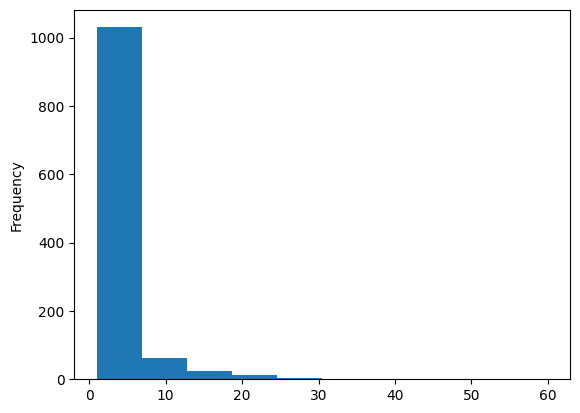

In [27]:
df.loc[df['conv1'] == 1]['Total_Conversion'].plot(kind='hist');

In [28]:
columns_to_one_hot_encode = ['pareto_interest','xyz_campaign_id', 'gender','age']  # Add all columns you want to encode

# Use get_dummies to create dummy variables for specified columns
df_dummies = pd.get_dummies(df[columns_to_one_hot_encode], prefix='', prefix_sep='')

# Convert boolean columns to integers
boolean_columns = df_dummies.select_dtypes(include='bool').columns
df_dummies[boolean_columns] = df_dummies[boolean_columns].astype(int)
df = pd.concat([df, df_dummies], axis=1)

In [29]:
df2 = df.drop(['age', 'gender', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'pareto_interest'], axis=1).set_index('ad_id')

# Model Development

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Best R2 Score: 0.8354 at Epoch: 714
Mean squared error is : 3.1696 at Epoch: 714
Final R2 Score (Test Set): 0.8320


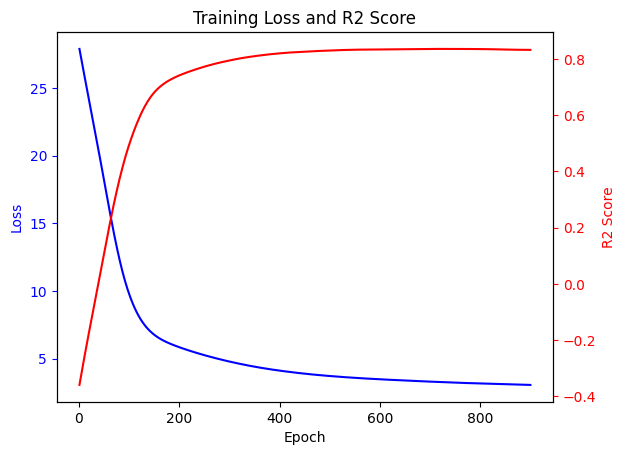

In [38]:
# Prepare the data
X = df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1).values
Y = df2[['Total_Conversion']].values

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define the Fully Connected Neural Network (FCNN) model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_size = 73
output_size = 1
learning_rate = 0.001
num_epochs = 900

# Create the FCNN model
model = FCNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_values = []
r2_values = []
best_r2_score = -float('inf')
best_epoch = 0

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the loss value
    loss_values.append(loss.item())

    # Evaluation
    model.eval()
    with torch.no_grad():
        Y_pred_tensor = model(X_test_tensor)
        r2_test = r2_score(Y_test, Y_pred_tensor.numpy())
        mse = mean_squared_error(Y_test, Y_pred_tensor.numpy())

    # Save the R2 value
    r2_values.append(r2_test)

    # Check if current R2 score is the best so far
    if r2_test > best_r2_score:
        best_r2_score = r2_test
        best_epoch = epoch + 1

# Print the best R2 score and the corresponding epoch
print(f'Best R2 Score: {best_r2_score:.4f} at Epoch: {best_epoch}')
print(f'Mean squared error is : {mse:.4f} at Epoch: {best_epoch}')


# Plot the loss values and R2 values
fig, ax1 = plt.subplots()

ax1.plot(range(1, num_epochs + 1), loss_values, 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, num_epochs + 1), r2_values, 'r-')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title('Training Loss and R2 Score')
plt.show()
